In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('UberDataset.csv')
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [5]:
# Handling missing values in 'PURPOSE' column
dataset['PURPOSE'].fillna('NOT AVAILABLE', inplace = True)

In [6]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT AVAILABLE
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
# changing data type of columns START_DATE and END_DATE

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [9]:
# Creating a new columns name DATE and TIME
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])  
dataset['DATE'] = dataset['START_DATE'].dt.date  
dataset['TIME'] = dataset['START_DATE'].dt.hour

In [14]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT AVAILABLE,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [10]:
# Creating new column Day-Night

dataset['DAY-NIGHT'] = pd.cut(x = dataset['TIME'], bins =[0,5,12,17,21,24], labels = ['Late-Night','Morning','Afternoon','Evening','Night'])

In [11]:
dataset.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT AVAILABLE,2016-01-02,1.0,Late-Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening


In [12]:
# Droping null values from dataset

dataset.dropna(inplace = True)

In [13]:
dataset.shape

(413, 10)

In [14]:
# Creating a new column Name 'MONTH'.

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')

dataset['MONTH'] = dataset['START_DATE'].dt.month

month_label = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

dataset['MONTH'] = dataset['MONTH'].map(month_label)
mon = dataset['MONTH'].value_counts(sort=False)


In [35]:
dataset.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT AVAILABLE,2016-01-02,1.0,Late-Night,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,January


In [15]:
# Creating a new column Name 'DAY'

dataset['DAY'] = dataset['START_DATE'].dt.weekday
data_label = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
dataset['DAY'] = dataset['DAY'].map(data_label)


In [50]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening,January,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT AVAILABLE,2016-01-02,1.0,Late-Night,January,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Afternoon,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January,Wednesday


# Data Visualization

([0, 1], [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

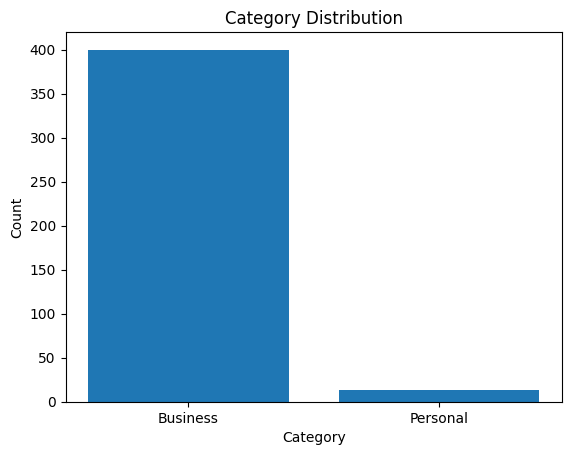

In [16]:
# In which category do people book the most Uber rides ?

category_counts = dataset['CATEGORY'].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'NOT AVAILABLE'),
  Text(1, 0, 'Meeting'),
  Text(2, 0, 'Meal/Entertain'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Errand/Supplies'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

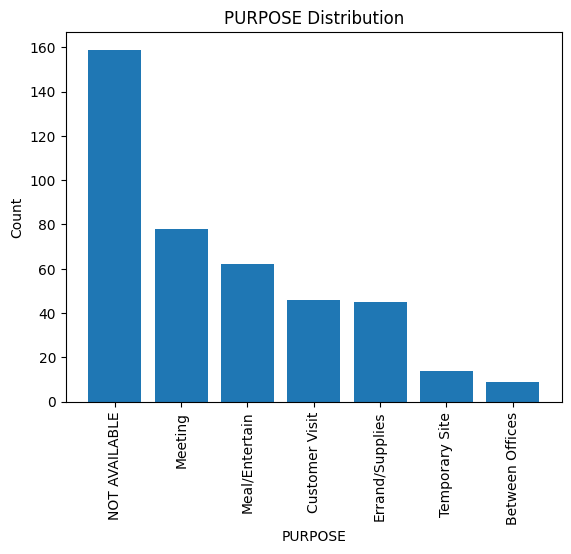

In [31]:
# For which Purpose do people book Uber rides the most ?

PURPOSE_counts = dataset['PURPOSE'].value_counts()

plt.bar(PURPOSE_counts.index, PURPOSE_counts.values)
plt.xlabel('PURPOSE')
plt.ylabel('Count')
plt.title('PURPOSE Distribution')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Afternoon'),
  Text(1, 0, 'Evening'),
  Text(2, 0, 'Morning'),
  Text(3, 0, 'Night'),
  Text(4, 0, 'Late-Night')])

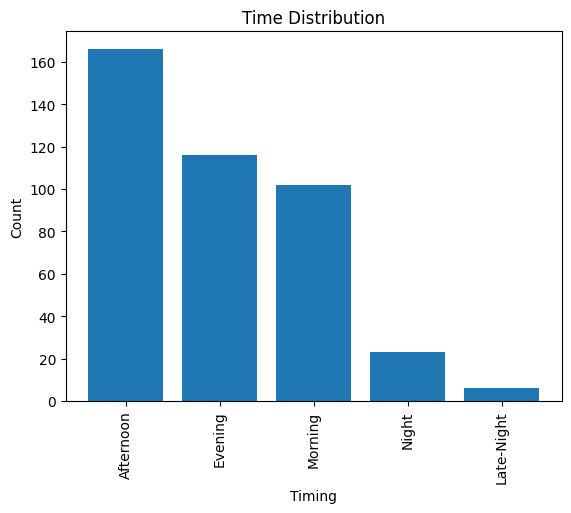

In [17]:
# At which time do people book cabs the most from Uber ? 

Time_count = dataset['DAY-NIGHT'].value_counts()
plt.bar(Time_count.index, Time_count.values)
plt.xlabel('Timing')
plt.ylabel('Count')
plt.title('Time Distribution')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

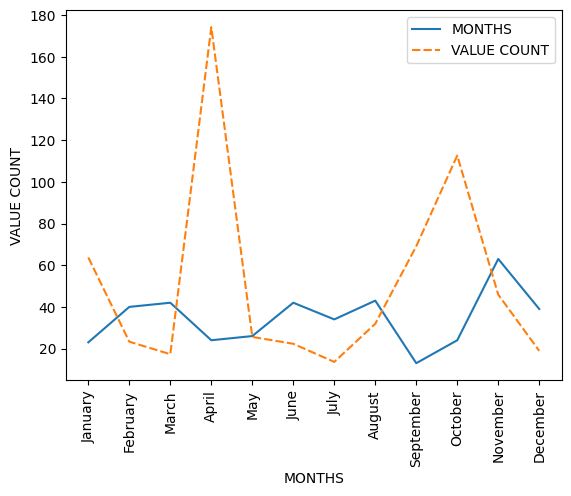

In [48]:
# In which months do people book Uber rides less Frequently ?

df = pd.DataFrame(
    {
        'MONTHS' : mon.values,
        'VALUE COUNT': dataset.groupby('MONTH',sort = False)['MILES'].max()
    }
)

p = sns.lineplot(df)
p.set(xlabel = 'MONTHS', ylabel = 'VALUE COUNT')
plt.xticks(rotation=90)

In [18]:
# In  which days of the week do people book Uber rides the most ?
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening,January,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT AVAILABLE,2016-01-02,1.0,Late-Night,January,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Afternoon,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January,Wednesday


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Sunday')])

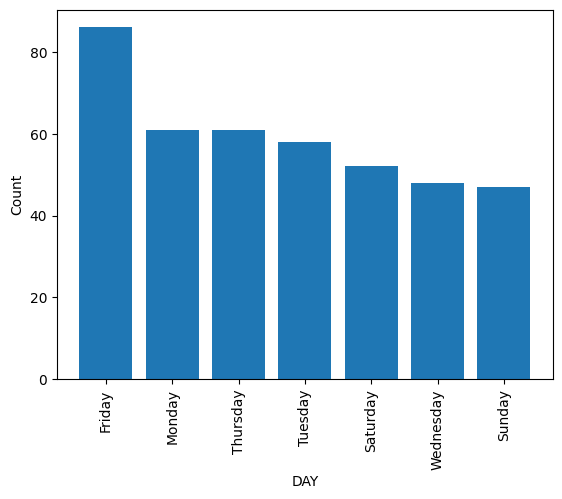

In [21]:
days_label = dataset['DAY'].value_counts()
plt.bar(days_label.index, days_label.values)
plt.xlabel('DAY')
plt.ylabel('Count')
plt.xticks(rotation=90)

<Axes: ylabel='MILES'>

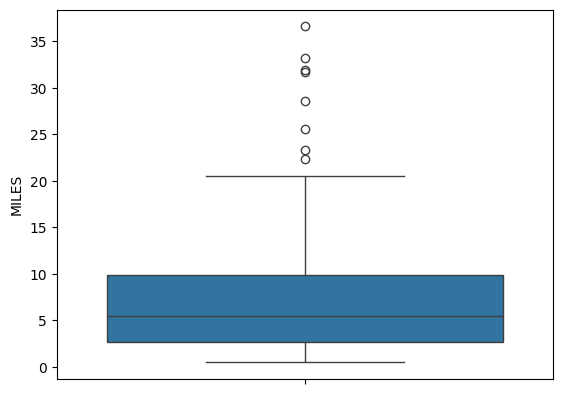

In [24]:
# How many miles do people usually book a cab for through Uber
sns.boxplot(dataset[dataset['MILES']<40]['MILES'])

C:\Users\Mehul\AppData\Local\Temp\ipykernel_1824\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

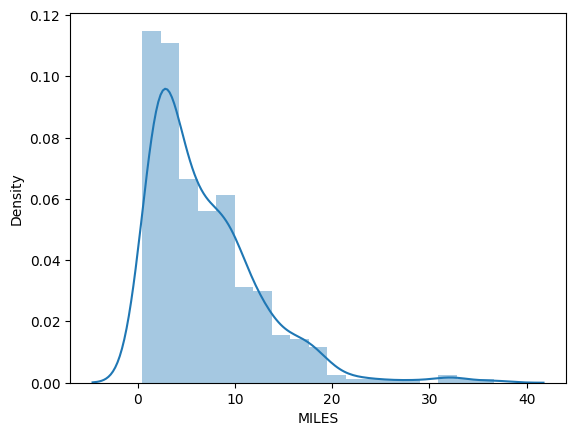

In [26]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])